In [11]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfTransformer
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_distances
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

from sklearn.decomposition import TruncatedSVD
from wordcloud import WordCloud
import scipy.cluster.hierarchy as sch
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Prepare data

In [3]:
df = pd.read_csv('lyrics_cv.csv')
df_t = pd.DataFrame(TfidfTransformer().fit_transform(df).toarray(), columns=df.columns)
df_t

,afraid,aliv,allah,alon,alreadi,alright,alway,angel,anoth,answer,...,wonder,word,work,world,worri,write,wrong,yeah,year,young
0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.00000,0.0,0.0,0.204201,0.000000,0.076755,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.049044,0.000000,0.0
2,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.098855,0.0,0.0,0.0,0.0,0.000000,0.062753,0.000000,0.0
3,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.416135,0.0,0.0,0.0,0.0,0.000000,0.000000,0.112594,0.0
4,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.070135,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20319,0.0,0.0,0.0,0.11921,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.062285,0.000000,0.000000,0.0
20320,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.054335,0.0,...,0.0,0.054692,0.0,0.0,0.0,0.0,0.000000,0.867968,0.000000,0.0
20321,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.088289,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.128644,0.000000,0.0
20322,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.032117,0.000000,0.0


# K-means

## Optimal *k*

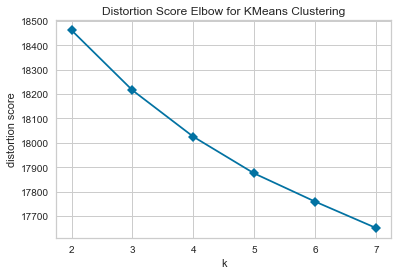

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=False)

In [4]:
kelbow_visualizer(KMeans(random_state=42), df_t, k=(2,8), timings=False)

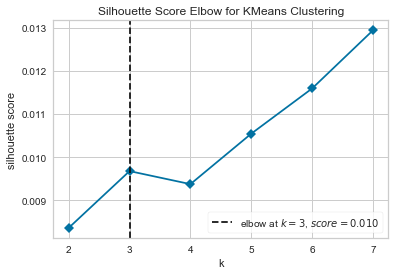

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>,
                 k=None, locate_elbow=True, metric='silhouette', model=None,
                 timings=False)

In [5]:
kelbow_visualizer(KMeans(random_state=42), df_t, k=(2,8), metric='silhouette', timings=False)

## *k* = 2

In [6]:
model2 = KMeans(n_clusters = 2, random_state=42)
model2.fit(df_t)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [7]:
# accuracy
sum(model2.labels_ == pd.read_csv('lyrics_processed.csv')['hit'])/len(df_t)

0.8154890769533556

In [22]:
labels = pd.read_csv('lyrics_processed.csv')[['hit']]
labels['label_2'] = model2.labels_
pd.crosstab(labels['label_2'], labels['hit'], rownames=['cluster'], colnames=['hit'])

hit,0.0,1.0
cluster,,
0,15466,2150
1,1600,1108


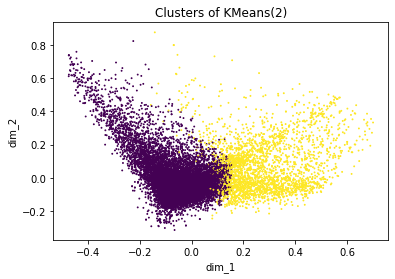

In [14]:
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

svd = TruncatedSVD(n_components=3, random_state=42)
dtm_3d = svd.fit_transform(df_t)

plt.figure(figsize=(6,4))
plt.scatter(dtm_3d[:, 1], dtm_3d[:, 2], s=0.8, c=model2.labels_)
plt.xlabel('dim_1')
plt.ylabel('dim_2')
plt.title('Clusters of KMeans(2)')
plt.show()

## *k* = 3

In [23]:
model3 = KMeans(n_clusters = 3, random_state=42)
model3.fit(df_t)

labels['label_3'] = model3.labels_
pd.crosstab(labels['label_3'], labels['hit'], rownames=['cluster'], colnames=['hit'])

hit,0.0,1.0
cluster,,
0,13987,1895
1,1469,1053
2,1610,310


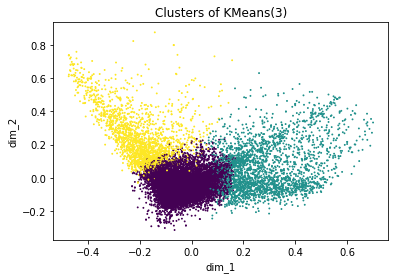

In [15]:
plt.figure(figsize=(6,4))
plt.scatter(dtm_3d[:, 1], dtm_3d[:, 2], s=0.8, c=model3.labels_)
plt.xlabel('dim_1')
plt.ylabel('dim_2')
plt.title('Clusters of KMeans(3)')
plt.show()

## *k* = 5

In [24]:
model5 = KMeans(n_clusters = 5, random_state=42)
model5.fit(df_t)

labels['label_5'] = model5.labels_
pd.crosstab(labels['label_5'], labels['hit'], rownames=['cluster'], colnames=['hit'])

hit,0.0,1.0
cluster,,
0,3747,1009
1,740,412
2,10541,1036
3,1373,254
4,665,547


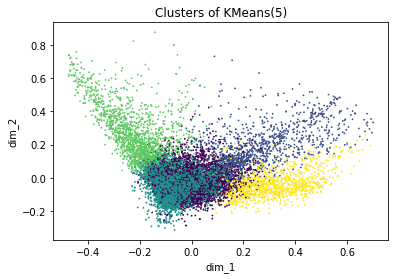

In [16]:
plt.figure(figsize=(6,4))
plt.scatter(dtm_3d[:, 1], dtm_3d[:, 2], s=0.6, c=model5.labels_)
plt.xlabel('dim_1')
plt.ylabel('dim_2')
plt.title('Clusters of KMeans(5)')
plt.show()

## Wordcloud of each cluster (*k* = 3)

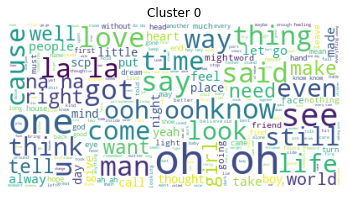

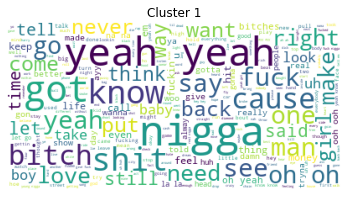

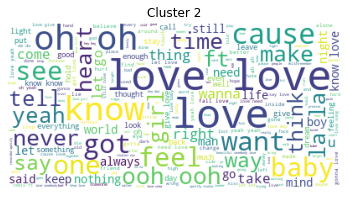

In [29]:
lyrics = pd.read_csv('lyrics_processed.csv')
lyrics['label'] = model3.labels_

for i in range(3):
    text = ' '.join(lyrics.loc[lyrics['label']==i, 'tokenized'])
    plt.figure(figsize=(6,4))
    wordcloud = WordCloud(max_font_size=50, max_words=500, background_color='white').generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('Cluster %s' %i)
    plt.show()

# Hierarchical clustering

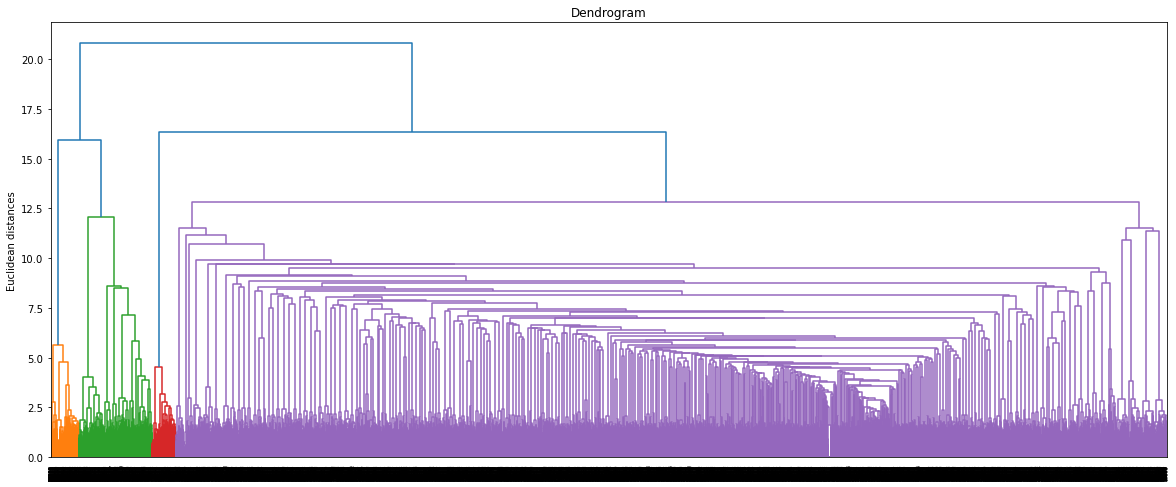

In [30]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(df_t, method  = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

## *n_clusters* = 4

### Euclidean distance

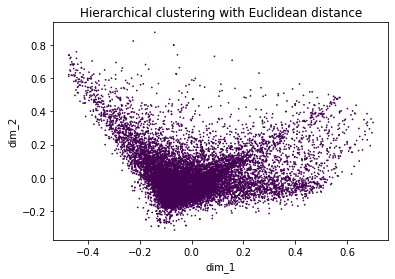

In [35]:
hc_euc = AgglomerativeClustering(n_clusters=4,
                                 affinity = 'euclidean',
                                 linkage = 'single')

hc_euc.fit(df_t)

plt.figure(figsize=(6,4))
plt.scatter(dtm_3d[:, 1], dtm_3d[:, 2], s=0.5, c=hc_euc.labels_)
plt.xlabel('dim_1')
plt.ylabel('dim_2')
plt.title('Hierarchical clustering with Euclidean distance')
plt.show()

In [34]:
labels['label_hc_euc'] = hc_euc.labels_
pd.crosstab(labels['label_hc_euc'], labels['hit'], rownames=['cluster'], colnames=['hit'])

hit,0.0,1.0
cluster,,
0,17064,3257
1,0,1
2,1,0
3,1,0


### Manhattan distance

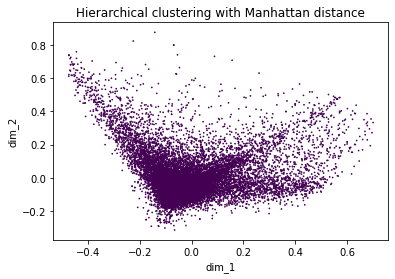

In [36]:
hc_man = AgglomerativeClustering(n_clusters=4,
                                 affinity = 'manhattan',
                                 linkage = 'single')

hc_man.fit(df_t)

plt.figure(figsize=(6,4))
plt.scatter(dtm_3d[:, 1], dtm_3d[:, 2], s=0.5, c=hc_man.labels_)
plt.xlabel('dim_1')
plt.ylabel('dim_2')
plt.title('Hierarchical clustering with Manhattan distance')
plt.show()

In [38]:
labels['label_hc_man'] = hc_man.labels_
pd.crosstab(labels['label_hc_man'], labels['hit'], rownames=['cluster'], colnames=['hit'])

hit,0.0,1.0
cluster,,
0,17060,3258
1,2,0
2,3,0
3,1,0


## Cosine distance

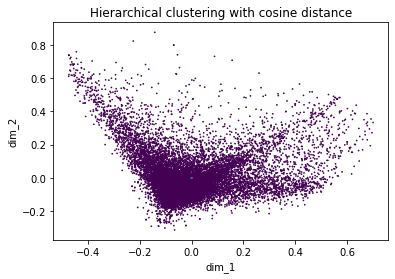

In [62]:
cosine_dist = cosine_distances(df_t)

hc_cos = AgglomerativeClustering(n_clusters=4,
                                 affinity = 'precomputed',
                                 linkage = 'single')

hc_cos.fit(cosine_dist)

plt.figure(figsize=(6,4))
plt.scatter(dtm_3d[:, 1], dtm_3d[:, 2], s=0.5, c=hc_cos.labels_)
plt.xlabel('dim_1')
plt.ylabel('dim_2')
plt.title('Hierarchical clustering with cosine distance')
plt.show()

In [63]:
labels['label_hc_cos'] = hc_cos.labels_
pd.crosstab(labels['label_hc_cos'], labels['hit'], rownames=['cluster'], colnames=['hit'])

hit,0.0,1.0
cluster,,
0,17066,3255
1,0,1
2,0,1
3,0,1


# DBSCAN

## Determine epsilon

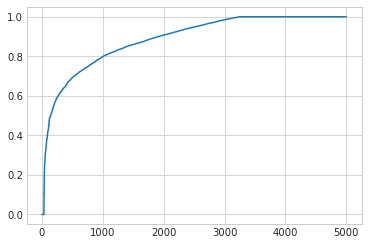

In [71]:
nbrs = NearestNeighbors(n_neighbors=5).fit(df_t)
distances, indices = nbrs.kneighbors(df_t)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

with plt.style.context('seaborn-whitegrid'):
    plt.plot(distances)
plt.show()

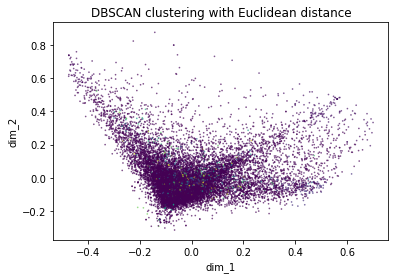

In [72]:
db_euc = DBSCAN(eps=0.6, metric='euclidean', n_jobs=-1)
db_euc.fit(df_t)

plt.figure(figsize=(6,4))
plt.scatter(dtm_3d[:, 1], dtm_3d[:, 2], s=0.5, c=db_euc.labels_, alpha=0.6)
plt.xlabel('dim_1')
plt.ylabel('dim_2')
plt.title('DBSCAN clustering with Euclidean distance')
plt.show()

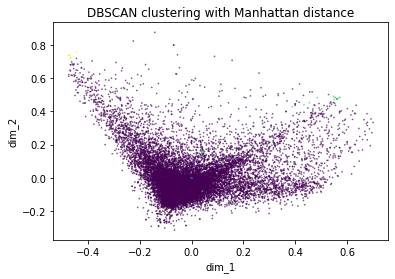

In [75]:
db_man = DBSCAN(eps=0.6, metric='manhattan', n_jobs=-1)
db_man.fit(df_t)

plt.figure(figsize=(6,4))
plt.scatter(dtm_3d[:, 1], dtm_3d[:, 2], s=0.5, c=db_man.labels_, alpha=0.6)
plt.xlabel('dim_1')
plt.ylabel('dim_2')
plt.title('DBSCAN clustering with Manhattan distance')
plt.show()

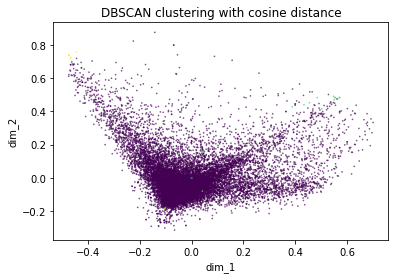

In [76]:
db_cos = DBSCAN(eps=0.6, metric='manhattan', n_jobs=-1)
db_cos.fit(df_t)

plt.figure(figsize=(6,4))
plt.scatter(dtm_3d[:, 1], dtm_3d[:, 2], s=0.5, c=db_cos.labels_, alpha=0.6)
plt.xlabel('dim_1')
plt.ylabel('dim_2')
plt.title('DBSCAN clustering with cosine distance')
plt.show()